## AI-Powered Patient Monitoring System for Fall Detection

### Import required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
from glob import glob
from tqdm import tqdm


## Data Exploration

#### Load datasets

##### Fall Dataset

In [2]:
fall_dataset_path = os.path.expanduser("~/Documents/AI-veFallen/Fall_/")
train_images_fall = os.path.join(fall_dataset_path, "images/train/")
val_images_fall = os.path.join(fall_dataset_path, "images/val/")
train_labels_fall = os.path.join(fall_dataset_path, "labels/train/")
val_labels_fall = os.path.join(fall_dataset_path, "labels/val/")

##### UR Fall Dataset

In [3]:
ur_fall_dataset_path = os.path.expanduser("~/Documents/AI-veFallen/UR Fall/")
train_images_ur = os.path.join(ur_fall_dataset_path, "train/")
valid_images_ur = os.path.join(ur_fall_dataset_path, "valid/")
test_images_ur = os.path.join(ur_fall_dataset_path, "test/")
# coco_annotations_file = os.path.join(ur_fall_dataset_path, "annotations.coco.json")

#### Load COCO Annotations

In [4]:
coco_annotations_train = os.path.join(ur_fall_dataset_path, "train/_annotations.coco.json")
coco_annotations_valid = os.path.join(ur_fall_dataset_path, "valid/_annotations.coco.json")
coco_annotations_test = os.path.join(ur_fall_dataset_path, "test/_annotations.coco.json")

# Function to load COCO annotations safely
def load_coco_annotations(file_path):
    if os.path.exists(file_path):
        with open(file_path, "r") as f:
            return json.load(f)
    else:
        print(f"Warning: COCO annotation file not found - {file_path}")
        return None
    
ur_fall_annotations_train = load_coco_annotations(coco_annotations_train)
ur_fall_annotations_valid = load_coco_annotations(coco_annotations_valid)
ur_fall_annotations_test = load_coco_annotations(coco_annotations_test) 

print("Available files in train:", os.listdir(train_images_ur))
print("Available files in valid:", os.listdir(valid_images_ur))
print("Available files in test:", os.listdir(test_images_ur))


Available files in train: ['adl-01-cam0-rgb-003_png.rf.a38972b356f98322b92df9d1daf6d2c6.jpg', 'adl-01-cam0-rgb-004_png.rf.c30f89c199ef9b50515ab1fd37ba885a.jpg', 'adl-01-cam0-rgb-006_png.rf.9577d9a88db9fbff778c0d8486fec183.jpg', 'adl-01-cam0-rgb-007_png.rf.2bc4fb606f6de8a9b577c0f678469173.jpg', 'adl-01-cam0-rgb-008_png.rf.87f92860a5d59746c21f8247f4d9a12f.jpg', 'adl-01-cam0-rgb-010_png.rf.09f74f5ea67d80687accf5d15aae6a34.jpg', 'adl-01-cam0-rgb-012_png.rf.e69d64866fb5c17eb38bb14f506fbb0f.jpg', 'adl-01-cam0-rgb-015_png.rf.1d0797945e6439baac5c2f050c1d8cd1.jpg', 'adl-01-cam0-rgb-017_png.rf.8c12a68fd14cdd1cac677d1e6500854a.jpg', 'adl-01-cam0-rgb-018_png.rf.e9677d5f34e22e645d58ac2f82adeb0e.jpg', 'adl-01-cam0-rgb-019_png.rf.a324106703ae30a3ba7ee6b48da89c06.jpg', 'adl-01-cam0-rgb-020_png.rf.d574a91d55e386aa469a096e79e5807f.jpg', 'adl-01-cam0-rgb-021_png.rf.b0ba514bbbc03f8ebe41ec5deb94989c.jpg', 'adl-01-cam0-rgb-022_png.rf.c4fef5f63787aa31a49762087f130066.jpg', 'adl-01-cam0-rgb-024_png.rf.4f9954b

#### Load images and labels

In [5]:
# Load images from Fall dataset
train_images_fall_list = glob(os.path.join(train_images_fall, "*.*"))
val_images_fall_list = glob(os.path.join(val_images_fall, "*.*"))

# Load images from UR Fall dataset
train_images_ur_list = glob(os.path.join(train_images_ur, "*.*"))
valid_images_ur_list = glob(os.path.join(valid_images_ur, "*.*"))
test_images_ur_list = glob(os.path.join(test_images_ur, "*.*"))

# Load COCO annotations
# with open(coco_annotations_file, "r") as f:
#     ur_fall_annotations = json.load(f)
    
# Print the dataset summary
print("Fall dataset train images exist:", os.path.exists(train_images_fall))
print("UR Fall dataset train images exist:", os.path.exists(train_images_ur))

Fall dataset train images exist: True
UR Fall dataset train images exist: True


In [7]:
print(f"Fall - Train Images: {len(train_images_fall_list)}, Val Images: {len(val_images_fall_list)}")
print(f"UR Fall - Train Images: {len(train_images_ur_list)}, Valid Images: {len(valid_images_ur_list)}, Test Images: {len(test_images_ur_list)}")

Fall - Train Images: 374, Val Images: 111
UR Fall - Train Images: 2001, Valid Images: 401, Test Images: 201


#### Merge the Datasets

##### Merge train images from both datasets

In [8]:
merged_train_images = train_images_fall_list + train_images_ur_list
merged_val_images = val_images_fall_list + valid_images_ur_list


##### Count the merged dataset sizes

In [10]:
dataset_counts = {
    "Kaggle Train": len(train_images_fall_list),
    "Kaggle Val": len(val_images_fall_list),
    "UR Train": len(train_images_ur_list),
    "UR Valid": len(valid_images_ur_list),
    "UR Test": len(test_images_ur_list),
    "Merged Train": len(merged_train_images),
    "Merged Validation": len(merged_val_images),
}
print(dataset_counts)

{'Kaggle Train': 374, 'Kaggle Val': 111, 'UR Train': 2001, 'UR Valid': 401, 'UR Test': 201, 'Merged Train': 2375, 'Merged Validation': 512}


##### Plot the dataset distribution

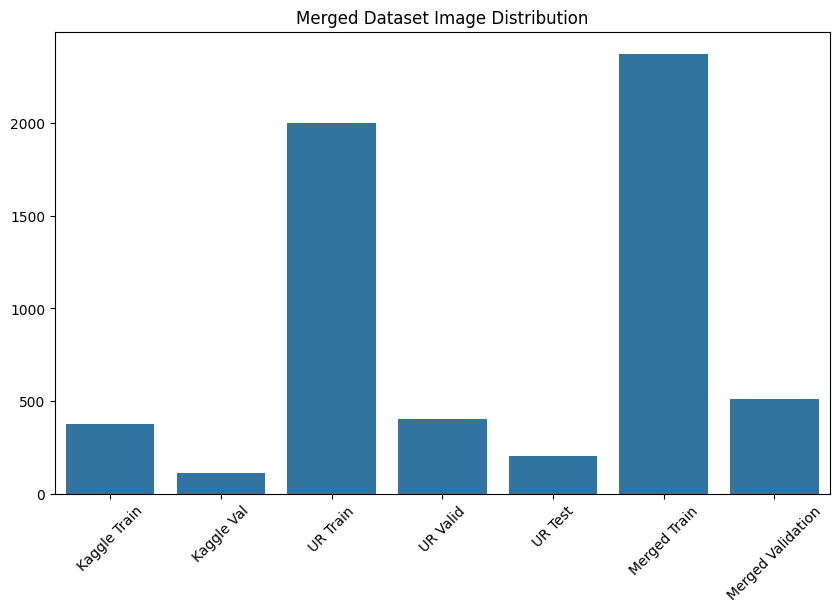

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(dataset_counts.keys()), y=list(dataset_counts.values()))
plt.title("Merged Dataset Image Distribution")
plt.xticks(rotation=45)
plt.show()

#### Display sample images from merged datasets

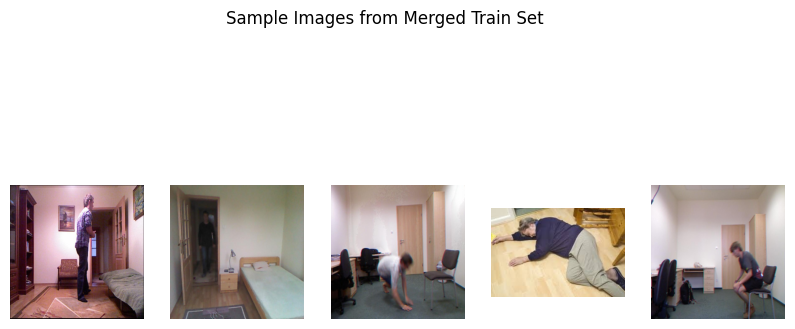

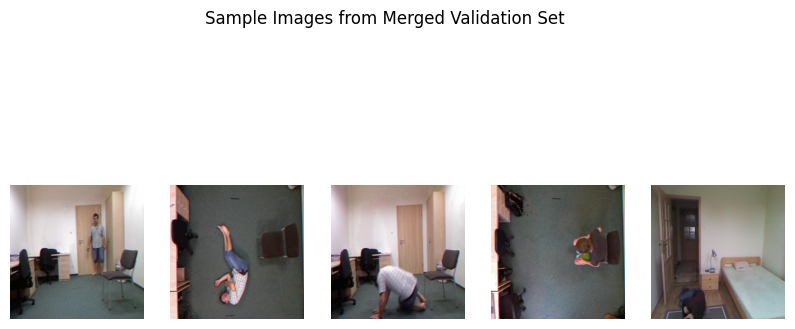

In [15]:
def show_sample_images(image_paths, title="Sample Images"):
    if len(image_paths) == 0:
        print(f"Warning: No images found for {title}")
        return
    
    plt.figure(figsize=(10, 5))
    
    for i, img_path in enumerate(np.random.choice(image_paths, min(5, len(image_paths)), replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

# Show sample images from merged training set
show_sample_images(merged_train_images, "Sample Images from Merged Train Set")

# Show sample images from merged validation set
show_sample_images(merged_val_images, "Sample Images from Merged Validation Set")
